In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
class SobelFilter:
    def filter_v(self, img):
        ksize = 3
        pad = ksize // 2
        K = np.array([ [1, 2, 1], [0, 0, 0], [-1, -2, -1] ], dtype=np.float32)

        H, W = img.shape
        input_image = np.pad(img, (1, 1), 'edge').astype(np.float32)
        output_image = input_image.copy()
        for i in range(H):
            for j in range(W):
                output_image[pad+i, pad+j] = np.mean(K * input_image[i:i+ksize, j:j+ksize])
        output_image = output_image[pad:pad+H, pad:pad+W]
        return output_image
    
    def filter_h(self, img):
        ksize = 3
        pad = ksize // 2
        K = np.array([ [1, 0, -1], [2, 0, -2], [1, 0, -1] ], dtype=np.float32)

        H, W = img.shape
        input_image = np.pad(img, (1, 1), 'edge').astype(np.float32)
        output_image = input_image.copy()
        for i in range(H):
            for j in range(W):
                output_image[pad+i, pad+j] = np.mean(K * input_image[i:i+ksize, j:j+ksize])
        output_image = output_image[pad:pad+H, pad:pad+W]
        return output_image

In [36]:
class HessianMatrix:
    def __init__(self, Ix, Iy):
        self.Ix = Ix
        self.Iy = Iy
        self.Ix2 = Ix**2
        self.Iy2 = Iy**2
        self.Ixy = Ix * Iy
        
    def get_matrix(self, y, x):
        return [
            [ self.Ix2[y, x], self.Ixy[y, x] ],
            [ self.Ixy[y, x], self.Iy2[y, x] ]
        ]
    
    def determinant(self):
        return self.Ix2 * self.Iy2 - self.Ixy**2
    
    def trace(self):
        return self.Ix2 + self.Iy2

In [72]:
class CornerDetection:
    def __init__(self):
        self.sobel = SobelFilter()
    
    def hessian(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        H, W = img_gray.shape
        Ix = self.sobel.filter_h(img_gray).astype(np.float32)
        Iy = self.sobel.filter_v(img_gray).astype(np.float32)
        hessian_mat = HessianMatrix(Ix, Iy)
        det = np.pad(hessian_mat.determinant(), 1)
        max_det = det.max()
        
        output_img = np.array((img_gray, img_gray, img_gray), dtype=np.uint8)
        output_img = np.transpose(output_img, (1, 2, 0))
        mask = np.zeros((H, W), dtype=np.uint8)
        for y in range(H):
            for x in range(W):
                max_value = det[y:y+3, x:x+3].max()
                if det[y+1, x+1] == max_value and det[y+1, x+1] > max_det * 0.1:
                    output_img[y, x] = [0, 0, 255]  # red
                    mask[y, x] = 255
        return output_img, mask

In [66]:
class Solver:
    def __init__(self):
        self.cd = CornerDetection()
        
    def problem_81(self, img):
        output_img, mask = self.cd.hessian(img)
        plt.subplot(1, 2, 1)
        plt.imshow(output_img)
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.show()

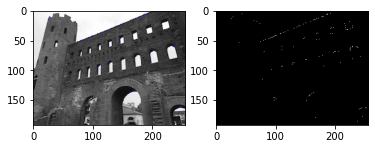

In [73]:
input_img = cv2.imread("../thorino.jpg")
solver = Solver()
solver.problem_81(input_img)